In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv("bank.csv")

In [44]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7469,7470,15717065,Balashov,686,France,Female,35,8,105419.73,1,1,0,35356.46,0
8099,8100,15661656,Onwumelu,633,France,Male,38,2,91902.56,2,1,1,107673.35,0
9106,9107,15663650,Russell,698,Germany,Male,52,10,107304.39,3,1,0,28806.32,1
2010,2011,15612050,Castiglione,556,Spain,Female,48,8,168522.37,1,1,1,151310.16,0
8699,8700,15684469,Hsiung,841,Germany,Male,32,2,117070.21,1,1,0,113482.20,0
2361,2362,15635776,Trevisani,686,Germany,Female,43,5,154846.24,2,1,1,151903.60,0
106,107,15599195,Stiger,582,Germany,Male,32,1,88938.62,1,1,1,10054.53,0
2729,2730,15608230,Hoelscher,667,France,Male,23,1,0.00,2,1,0,91573.19,0
1920,1921,15723720,McKenzie,591,France,Female,31,7,0.00,2,0,1,48778.46,0
3729,3730,15697702,Lord,730,Spain,Male,29,2,0.00,2,1,0,14174.09,0


In [45]:
data.shape

(10000, 14)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

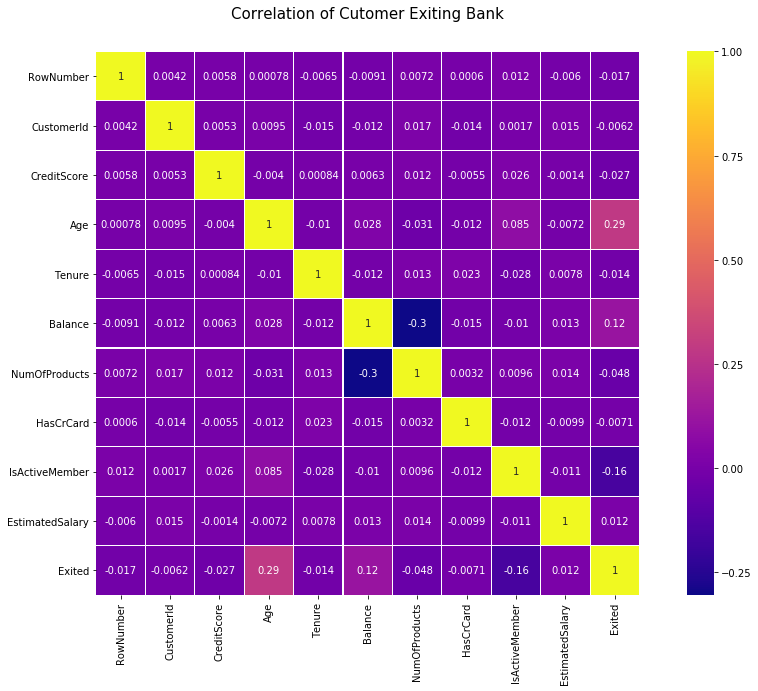

In [12]:
# CORRELATION - HEAT MAP
colormap = plt.cm.plasma
plt.figure(figsize=(17,10))
plt.title('Correlation of Cutomer Exiting Bank', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, 
            linecolor='white', annot=True)

In [14]:
#The data is not much correlated.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8990,8991,15729065,Mackay,784,Germany,Male,28,2,109960.06,2,1,1,170829.87,0
2026,2027,15603088,Rossi,451,Spain,Female,23,9,0.00,2,0,1,48021.71,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
404,405,15642291,Fontaine,685,France,Male,23,8,0.00,2,1,1,112239.03,0
6701,6702,15629390,Liao,653,France,Male,37,7,135847.47,1,1,0,144880.81,0
5530,5531,15736043,Hamilton,638,France,Male,34,6,114543.27,1,1,1,97755.29,0
8690,8691,15756167,Doyne,762,Spain,Female,43,5,134204.67,1,1,1,139971.01,0
6847,6848,15809462,Polyakova,656,France,Male,30,3,0.00,2,0,1,17104.00,0
829,830,15639788,Yuan,577,France,Female,39,10,0.00,2,1,0,10553.31,0
1718,1719,15762745,Macvitie,648,Spain,Male,32,8,0.00,1,1,0,133653.38,0


In [15]:
#Checking how many people are from which countries ... who exited or not 

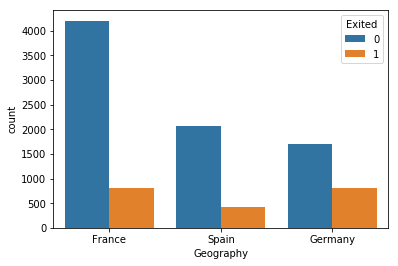

In [17]:
sns.countplot(x="Geography", data=data,hue="Exited")

In [ ]:
#Insight --- People in france generally do not exit 
# germany --- high ratio of ppl exit


In [18]:
#Removing CustomerId, RowNumber and Surname. Removing Surname is basically because One Hot Encoding will behave unusual if this column is retained(give error

In [47]:
newData = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [48]:
newData.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


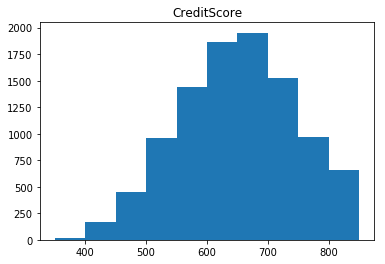

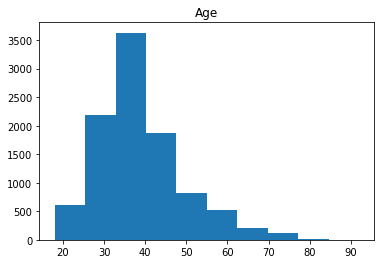

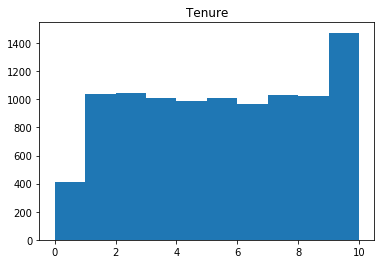

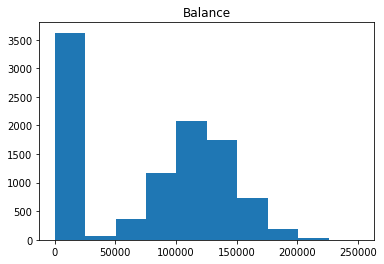

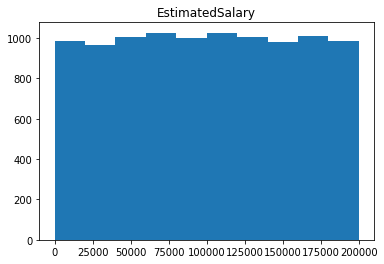

In [23]:
numerical_distribution = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for i in numerical_distribution:
    plt.hist(newData[i])
    plt.title(i)
    plt.show()

In [49]:
## Label Encoding of all the columns
# instantiate labelencoder object
le = LabelEncoder()

# Categorical boolean mask
categorical_feature_mask = bank_data_new.dtypes==object
categorical_feature_mask

CreditScore        False
Geography           True
Gender              True
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [50]:
# filter categorical columns using mask and turn it into a list
categorical_cols = newData.columns[categorical_feature_mask].tolist()

In [51]:
categorical_cols

['Geography', 'Gender']

In [52]:
newData[categorical_cols] = newData[categorical_cols].apply(lambda col: le.fit_transform(col))
print(newData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null int32
Gender             10000 non-null int32
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB
None


In [53]:
df_scaled = newData.apply(zscore)
X_columns =  df_scaled.columns.tolist()[1:10]
Y_Columns = newData.columns.tolist()[-1:]

X = df_scaled[X_columns].values
y = np.array(newData['Exited']) # Exited

print(y)
print(X)

[1 0 1 ... 1 1 0]
[[-0.90188624 -1.09598752  0.29351742 ...  0.64609167  0.97024255
   0.02188649]
 [ 1.51506738 -1.09598752  0.19816383 ... -1.54776799  0.97024255
   0.21653375]
 [-0.90188624 -1.09598752  0.29351742 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [-0.90188624 -1.09598752 -0.27860412 ... -1.54776799  0.97024255
  -1.00864308]
 [ 0.30659057  0.91241915  0.29351742 ...  0.64609167 -1.03067011
  -0.12523071]
 [-0.90188624 -1.09598752 -1.04143285 ...  0.64609167 -1.03067011
  -1.07636976]]


In [54]:
#splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 8)


In [55]:
X_train.shape

(8000, 9)

In [56]:
#Encoding the output class label (One-Hot Encoding)
y_train=to_categorical(y_train,2)
y_test=to_categorical(y_test,2)

In [57]:
#Normalize the data
from sklearn.preprocessing import Normalizer
normalize=Normalizer(norm="l2")
X_train=normalize.transform(X_train)

print(X_train)

[[-0.32660661  0.33042097  0.41707339 ...  0.23397387  0.35136098
   0.45409568]
 [ 0.41088162 -0.29722845 -0.04969698 ... -0.41974993  0.2631268
  -0.26355289]
 [-0.26269006 -0.31922543 -0.30333543 ... -0.45081435  0.28260002
  -0.48071808]
 ...
 [ 0.52973741  0.31902381  0.06928721 ...  0.22590344 -0.3603698
   0.19493733]
 [ 0.11730923  0.34911441 -0.17957026 ... -0.59221479 -0.39436019
  -0.28109801]
 [ 0.09429018  0.28060932 -0.05635766 ... -0.47600724  0.29839258
   0.53266892]]


In [58]:
X_test=normalize.transform(X_test)
print(X_test)

[[ 0.11961429 -0.42759232  0.63533595 ...  0.25206841  0.37853375
  -0.13253872]
 [ 0.10480879 -0.3746662   0.58929281 ...  0.22086812  0.33167995
   0.1222605 ]
 [ 0.50531507 -0.36554085 -0.15652774 ...  0.21548867 -0.34375576
   0.41137911]
 ...
 [ 0.11278809  0.33565943 -0.2077281  ...  0.23768326 -0.37916142
   0.59518817]
 [-0.3643766   0.36863206  0.08006139 ...  0.26103146 -0.41640736
   0.22923692]
 [-0.30802696  0.31162433 -0.09515344 ...  0.22066381 -0.35201134
   0.35994045]]


In [59]:
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()

In [60]:
model.add(Dense(units=6, activation='relu', input_shape=(9,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_4 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 42        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [62]:
print(X_train.shape)
print(y_train.shape)

(8000, 9)
(8000, 2)


In [63]:
history=model.fit(X_train, y_train, batch_size=45, epochs=200, validation_data=(X_test,y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/200
8000/8000 [==============================] - 1s 93us/sample - loss: 0.5515 - acc: 0.7886 - val_loss: 0.4843 - val_acc: 0.7935
Epoch 2/200
8000/8000 [==============================] - 0s 48us/sample - loss: 0.4693 - acc: 0.7970 - val_loss: 0.4478 - val_acc: 0.7935
Epoch 3/200
8000/8000 [==============================] - 0s 52us/sample - loss: 0.4419 - acc: 0.8008 - val_loss: 0.4257 - val_acc: 0.8035
Epoch 4/200
8000/8000 [==============================] - 0s 41us/sample - loss: 0.4307 - acc: 0.8111 - val_loss: 0.4210 - val_acc: 0.8100
Epoch 5/200
8000/8000 [==============================] - 0s 42us/sample - loss: 0.4267 - acc: 0.8155 - val_loss: 0.4158 - val_acc: 0.8140
Epoch 6/200
8000/8000 [==============================] - 0s 45us/sample - loss: 0.4236 - acc: 0.8194 - val_loss: 0.4125 - val_acc: 0.8155
Epoch 7/200
8000/8000 [==============================] - 0s 48us/sample - loss: 0.4212 - acc: 0.8205 - val_loss: 0.4104 - va

8000/8000 [==============================] - 0s 36us/sample - loss: 0.3728 - acc: 0.8462 - val_loss: 0.3721 - val_acc: 0.8485
Epoch 60/200
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3711 - acc: 0.8453 - val_loss: 0.3713 - val_acc: 0.8505
Epoch 61/200
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3704 - acc: 0.8454 - val_loss: 0.3715 - val_acc: 0.8490
Epoch 62/200
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3698 - acc: 0.8460 - val_loss: 0.3713 - val_acc: 0.8490
Epoch 63/200
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3689 - acc: 0.8469 - val_loss: 0.3699 - val_acc: 0.8505
Epoch 64/200
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3680 - acc: 0.8465 - val_loss: 0.3691 - val_acc: 0.8535
Epoch 65/200
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3674 - acc: 0.8484 - val_loss: 0.3688 - val_acc: 0.8520
Epoch 66/200
8000/8000 [================

Epoch 118/200
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3422 - acc: 0.8610 - val_loss: 0.3527 - val_acc: 0.8675
Epoch 119/200
8000/8000 [==============================] - 0s 37us/sample - loss: 0.3419 - acc: 0.8606 - val_loss: 0.3519 - val_acc: 0.8645
Epoch 120/200
8000/8000 [==============================] - 0s 53us/sample - loss: 0.3420 - acc: 0.8591 - val_loss: 0.3530 - val_acc: 0.8650
Epoch 121/200
8000/8000 [==============================] - 1s 72us/sample - loss: 0.3421 - acc: 0.8605 - val_loss: 0.3519 - val_acc: 0.8670
Epoch 122/200
8000/8000 [==============================] - 0s 42us/sample - loss: 0.3422 - acc: 0.8601 - val_loss: 0.3518 - val_acc: 0.8660
Epoch 123/200
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3415 - acc: 0.8595 - val_loss: 0.3512 - val_acc: 0.8650
Epoch 124/200
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3412 - acc: 0.8614 - val_loss: 0.3515 - val_acc: 0.8650
Epoch 125/200
8000/8

8000/8000 [==============================] - 0s 44us/sample - loss: 0.3352 - acc: 0.8625 - val_loss: 0.3475 - val_acc: 0.8635
Epoch 177/200
8000/8000 [==============================] - 0s 42us/sample - loss: 0.3358 - acc: 0.8609 - val_loss: 0.3470 - val_acc: 0.8670
Epoch 178/200
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3353 - acc: 0.8627 - val_loss: 0.3458 - val_acc: 0.8665
Epoch 179/200
8000/8000 [==============================] - 0s 52us/sample - loss: 0.3353 - acc: 0.8619 - val_loss: 0.3466 - val_acc: 0.8625
Epoch 180/200
8000/8000 [==============================] - 1s 74us/sample - loss: 0.3349 - acc: 0.8627 - val_loss: 0.3464 - val_acc: 0.8635
Epoch 181/200
8000/8000 [==============================] - 1s 69us/sample - loss: 0.3352 - acc: 0.8611 - val_loss: 0.3463 - val_acc: 0.8635
Epoch 182/200
8000/8000 [==============================] - 0s 62us/sample - loss: 0.3348 - acc: 0.8627 - val_loss: 0.3470 - val_acc: 0.8610
Epoch 183/200
8000/8000 [=========

The above code indicates:

X_train is the independent variable portion of the data which needs to be fitted with the model.

y_train is the output portion of the data which the model needs to produce after fitting.

batch_size: How often we want to back-propogate the error values so that individual node weights can be adjusted.

epochs: The number of times we want to run the entire test data over again to tune the weights. This is like the fuel of the algorithm.

validation_split: 0.1 The fraction of data to use for validation data.

## Checking the Accuracy for Test

In [64]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2000/2000 [==============================] - 0s 30us/sample - loss: 0.3434 - acc: 0.8705
[0.3434333027601242, 0.8705]


## Train Accuracy

In [66]:
score = model.evaluate(X_train, y_train,verbose=1)

print(score)

8000/8000 [==============================] - 0s 30us/sample - loss: 0.3309 - acc: 0.8633
[0.33088572630286217, 0.86325]


## Confusion Matrix Calculation

In [67]:
y_pred = model.predict(X_test)

In [72]:
# Predict the results using 0.5 as a threshold (5 points)

In [68]:
y_pred = (y_pred > 0.5)

In [69]:
from sklearn.metrics import confusion_matrix

confmatrx= confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [70]:
confmatrx

array([[1544,   43],
       [ 216,  197]], dtype=int64)

In [73]:
print (((confmatrx[0][0]+confmatrx[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

87.05 % of testing data was classified correctly


In [74]:
# Checking the accuracy using accuracy_score as well to check if the above calculation is correct or not.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8705

The Train and Test set are almost similar. It shows that the model did not overfit on the train set.


On Compiling the Neural Network, I have used optimizer as "adam" as it is very efficient to Stochastic Gradient Decent. The loss function used is "binary_crossentropy which is used within adam.


The accuracy metrics which will be evaluated(minimized) by the model. The "Accuracy" is used as a criteria to improve model performance.


On calculation of the accuracy based on the Confusion Matrix, it came out as 86.45(APPROX). which matches with the score calculated through various EPOCH


We can used Optimizer as "SGD" as well to check if we get better results and accuracy.